In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from machine_learning.classes import OptimizerConfigs, TrainConfigs
from machine_learning.autoencoders.convolutional_autoencoder import ConvolutionalAutoencoder, init_encoder, init_decoder, load, save
from machine_learning.strings import mse_loss_str, relu_str
from machine_learning.utils.utils_mnist import load_mnist_data_for_autoencoder
from machine_learning.utils.utils_nn import init_loss, train
from machine_learning.utils.utils_plot import plot_mnist_images

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (20, 4)

In [3]:
torch.manual_seed(0)

### data

In [4]:
dirpath = "../data/pytorch_mnist"

In [5]:
X_train_loader, X_val_loader, X_test_loader = load_mnist_data_for_autoencoder(dirpath)
X_test, _ = next(iter(X_test_loader))

### model and training

In [6]:
lr = 1e-3
weight_decay = 1e-5
optimizer_configs = OptimizerConfigs(lr=lr, weight_decay=weight_decay)

n_epochs = 50
patience = 50

verbose = True
verbose_freq = n_epochs / n_epochs

configs = TrainConfigs(optimizer_configs=optimizer_configs, n_epochs=n_epochs, patience=patience)

In [7]:
encoder = init_encoder()
decoder = init_decoder()
model = ConvolutionalAutoencoder(relu_str, encoder, relu_str, decoder)

In [8]:
criterion = init_loss(mse_loss_str, reduction="mean")

In [9]:
best_state_dict, best_val_loss, best_epoch = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 0.0007278989497572183, val loss 0.0006754325168828169
epoch 1, train loss 0.0006345043887073795, val loss 0.0005954941188295683
epoch 2, train loss 0.0005652743056416511, val loss 0.0005358628469208876
epoch 3, train loss 0.0005139795249948899, val loss 0.0004918999715397756
epoch 4, train loss 0.0004762883332247535, val loss 0.0004596450099100669
epoch 5, train loss 0.00044866812927648426, val loss 0.00043599262150625386
epoch 6, train loss 0.0004284152911665539, val loss 0.00041861597386499245
epoch 7, train loss 0.0004135303262931605, val loss 0.00040581303959091506
epoch 8, train loss 0.00040255952797209224, val loss 0.0003963522842774789
epoch 9, train loss 0.00039445306360721586, val loss 0.0003893443290144205
epoch 10, train loss 0.00038845278710747757, val loss 0.00038414622098207474
epoch 11, train loss 0.00038400943453113236, val loss 0.0003802906076113383
epoch 12, train loss 0.00038072257100914915, val loss 0.00037743533154328666
epoch 13, train loss 0.0

In [11]:
best_val_loss, best_epoch

(8.248287284125884e-05, 49)

### plotting

In [11]:
encoder = init_encoder()
decoder = init_decoder()
best_model = ConvolutionalAutoencoder(relu_str, encoder, relu_str, decoder)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [12]:
n_samples = 10

In [13]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

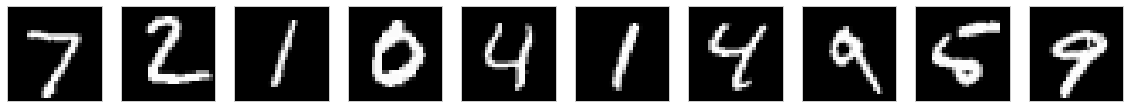

In [14]:
plot_mnist_images(samples, figsize)

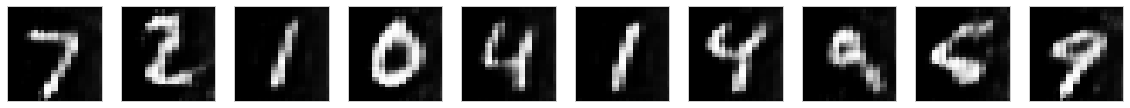

In [15]:
plot_mnist_images(samples_hat, figsize)

### denoising

In [16]:
X_train_loader, X_val_loader, X_test_loader = load_mnist_data_for_autoencoder(dirpath, noised=True, noise_factor=0.5)
X_test, _ = next(iter(X_test_loader))

In [19]:
encoder = init_encoder()
decoder = init_decoder()
model = ConvolutionalAutoencoder(relu_str, encoder, relu_str, decoder)

In [20]:
criterion = init_loss(mse_loss_str, reduction="mean")

In [21]:
best_state_dict, _, _ = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 0.0010336773078888654, val loss 0.0009610112595061461
epoch 1, train loss 0.0008972349306568503, val loss 0.0008362319879233837
epoch 2, train loss 0.0007833932607124249, val loss 0.0007339381302396456
epoch 3, train loss 0.0006912562052408854, val loss 0.0006522389551003774
epoch 4, train loss 0.000618316096564134, val loss 0.000588161504516999
epoch 5, train loss 0.0005491571938619018, val loss 0.00038786719491084416
epoch 6, train loss 0.0002860516238336762, val loss 0.00025809463982780776
epoch 7, train loss 0.00024333304857524732, val loss 0.00023278593613455692
epoch 8, train loss 0.00022474476687299707, val loss 0.00022129808148990075
epoch 9, train loss 0.00021668369757632414, val loss 0.00021532651192198197
epoch 10, train loss 0.00021139810071326792, val loss 0.00021049653676648934
epoch 11, train loss 0.00020657129593503972, val loss 0.00020582711603492497
epoch 12, train loss 0.0002015160316756616, val loss 0.00020021458653112252
epoch 13, train loss 0.0

In [22]:
encoder = init_encoder()
decoder = init_decoder()
best_model = ConvolutionalAutoencoder(relu_str, encoder, relu_str, decoder)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [23]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

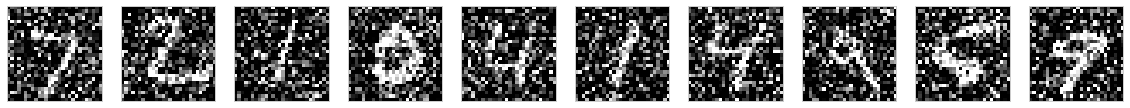

In [24]:
plot_mnist_images(samples, figsize)

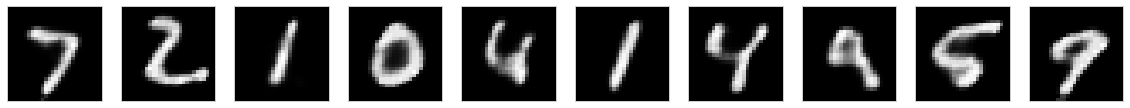

In [25]:
plot_mnist_images(samples_hat, figsize)

### saving and loading

In [26]:
filename = "convolutional_autoencoder.pt"
save(best_model, filename)

In [27]:
saved_model = load(filename)

In [28]:
saved_model.eval()
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

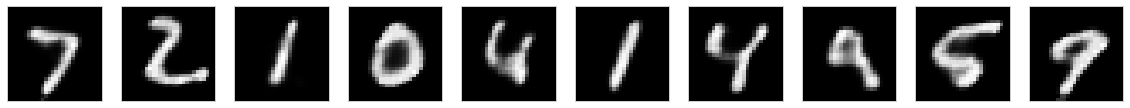

In [30]:
plot_mnist_images(samples_hat, figsize)